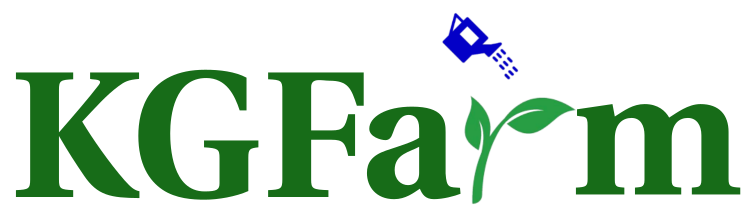
<br/>**A Data Preparation System for Data Science Across the Enterprise**

In [2]:
from operations.api import KGFarm
kgfarm = KGFarm(endpoint='http://localhost:7200', db='earthquake')

In [3]:
import pandas as pd
entity_df = pd.read_csv('feature_discovery\data\earthquake\seismic_activity - Copy.csv')
entity_df

,depth,gap,dmin,earthquake_id,horizontalError,depthError,magError,magnitude
0,82.770,139.0,0.8700,50000,8.46,21.213,0.097,3.10
1,79.194,104.0,1.1520,50001,5.51,7.445,0.083,4.50
2,24.000,246.0,0.8479,50002,0.91,15.950,0.090,3.93
3,63.787,187.0,0.4570,50003,10.25,6.579,0.238,4.30
4,10.000,190.0,0.4000,50004,1.41,1.999,0.085,3.00
...,...,...,...,...,...,...,...,...
26637,10.000,60.0,3.9240,76637,10.07,1.765,0.048,5.20
26638,10.000,121.0,1.8030,76638,9.17,1.870,0.042,5.10
26639,10.000,54.0,12.7760,76639,8.02,1.792,0.090,5.10
26640,153.264,61.0,3.7460,76640,8.52,7.433,0.081,4.70


# Baseline Approach

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error, r2_score

entity_df_clean = entity_df.fillna(0)

X_og = entity_df_clean.drop('magnitude',axis=1)
y_og = entity_df_clean['magnitude']

X_train, X_test, y_train, y_test = train_test_split(X_og, y_og, test_size=0.30, random_state=1)

regressors = {
    'Random forest Regressor': RandomForestRegressor(),
    'Gradient boosting Regressor': GradientBoostingRegressor(),
    'Decision Tree Regression': DecisionTreeRegressor()
baseline_approach = {}
# Train and evaluate each regressor
for name, regressor in regressors.items():
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    baseline_approach[name] = r2
    print(f"{name}: Mean Squared Error = {r2}")
# random_forest_regressor = RandomForestRegressor()
# gradient_boosting_regressor = GradientBoostingRegressor()
# support_vector_regressor = SVR()

# # fit the models on data
# random_forest_regressor.fit(X_train, y_train)
# gradient_boosting_regressor.fit(X_train, y_train)
# support_vector_regressor.fit(X_train, y_train)

# # evaluate model performance
# y_pred = random_forest_regressor.predict(X_test)
# r2_random_forest_regressor = round(r2_score(y_test, y_pred), 3)
# y_pred = gradient_boosting_regressor.predict(X_test)
# r2_gradient_boosting_regressor = round(r2_score(y_test, y_pred), 3)
# y_pred = support_vector_regressor.predict(X_test)
# r2_support_vector_regressor= round(r2_score(y_test, y_pred), 3)

# baseline_approach = {'Random forest Regressor': r2_random_forest_regressor,
#                          'Gradient boosting Regressor': r2_gradient_boosting_regressor,
#                          'Support vector Regressor': r2_support_vector_regressor}
# # instanciate the models
# random_forest_regressor = RandomForestRegressor()

# # fit the models on data
# random_forest_regressor.fit(X_train, y_train)

# # evaluate model performance
# y_pred = random_forest_regressor.predict(X_test)
# r2_random_forest_regressor = round(r2_score(y_test, y_pred), 3)

# Without_KGFarm_results = {'Random forest classifier': r2_random_forest_regressor}
# print(Without_KGFarm_results)

Random forest Regressor: Mean Squared Error = 0.8759558432434963
Gradient boosting Regressor: Mean Squared Error = 0.843811227335314
Linear Regression: Mean Squared Error = 0.5291491924388871
Ridge Regression: Mean Squared Error = 0.5291492855633422
Lasso Regression: Mean Squared Error = 0.40154052564630693
ElasticNet Regression: Mean Squared Error = 0.4870642062354774
Decision Tree Regression: Mean Squared Error = 0.7688886755390899
Random Forest Regression: Mean Squared Error = 0.8761130272696924
Gradient Boosting Regression: Mean Squared Error = 0.8438112273353139


# KGFarm Approach

## Recommending Data Enrichment

In [4]:
enrichment_info = kgfarm.search_enrichment_options(entity_df)
enrichment_info

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 23.19it/s]


,Enrich_with,Physical_joinable_table,Join_key,Joinability_strength,File_source,Dataset_feature_view
0,Feature_view_1,earthquake_stats.csv,earthquake_id,100%,feature_discovery\data\earthquake\earthquake_stats.csv,earthquake


In [5]:
entity_df = kgfarm.enrich(enrichment_info.iloc[0], entity_df)
entity_df

Enriching entity_df with 4 feature(s) ['nst', 'magNst', 'latitude', 'longitude']


,depth,gap,dmin,earthquake_id,horizontalError,depthError,magError,nst,magNst,latitude,longitude,magnitude
0,82.770,139.0,0.8700,50000,8.46,21.213,0.097,14.0,14.0,52.0999,178.5218,3.10
1,79.194,104.0,1.1520,50001,5.51,7.445,0.083,32.0,43.0,7.1397,126.7380,4.50
2,24.000,246.0,0.8479,50002,0.91,15.950,0.090,23.0,16.0,19.1631,-66.5251,3.93
3,63.787,187.0,0.4570,50003,10.25,6.579,0.238,17.0,5.0,-4.7803,102.7675,4.30
4,10.000,190.0,0.4000,50004,1.41,1.999,0.085,19.0,18.0,53.3965,-166.9417,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...
26637,10.000,60.0,3.9240,76637,10.07,1.765,0.048,72.0,141.0,-6.9527,154.9829,5.20
26638,10.000,121.0,1.8030,76638,9.17,1.870,0.042,74.0,187.0,32.3262,141.7386,5.10
26639,10.000,54.0,12.7760,76639,8.02,1.792,0.090,60.0,40.0,-7.2411,68.0663,5.10
26640,153.264,61.0,3.7460,76640,8.52,7.433,0.081,40.0,46.0,-19.1602,169.0428,4.70


## Recommending data cleaning operations

In [6]:
cleaning_info = kgfarm.recommend_cleaning_operations(entity_df)
cleaning_info

Encoding Completed!


,Cleaning Operation,Feature
0,Interpolate,"[[gap, dmin, horizontalError, magError, nst, magNst]]"
1,IterativeImputer,"[[gap, dmin, horizontalError, magError, nst, magNst]]"
2,SimpleImputer,"[[gap, dmin, horizontalError, magError, nst, magNst]]"


In [11]:
entity_df = kgfarm.apply_cleaning_operations(cleaning_info.loc[0], entity_df)
entity_df


all features look clean


,depth,gap,dmin,earthquake_id,horizontalError,depthError,magError,nst,magNst,latitude,longitude,magnitude
0,82.770,139.0,0.8700,50000.0,8.46,21.213,0.097,14.0,14.0,52.0999,178.5218,3.10
1,79.194,104.0,1.1520,50001.0,5.51,7.445,0.083,32.0,43.0,7.1397,126.7380,4.50
2,24.000,246.0,0.8479,50002.0,0.91,15.950,0.090,23.0,16.0,19.1631,-66.5251,3.93
3,63.787,187.0,0.4570,50003.0,10.25,6.579,0.238,17.0,5.0,-4.7803,102.7675,4.30
4,10.000,190.0,0.4000,50004.0,1.41,1.999,0.085,19.0,18.0,53.3965,-166.9417,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...
26637,10.000,60.0,3.9240,76637.0,10.07,1.765,0.048,72.0,141.0,-6.9527,154.9829,5.20
26638,10.000,121.0,1.8030,76638.0,9.17,1.870,0.042,74.0,187.0,32.3262,141.7386,5.10
26639,10.000,54.0,12.7760,76639.0,8.02,1.792,0.090,60.0,40.0,-7.2411,68.0663,5.10
26640,153.264,61.0,3.7460,76640.0,8.52,7.433,0.081,40.0,46.0,-19.1602,169.0428,4.70


## Recommending feature transformations

In [4]:
transformation_info = kgfarm.recommend_transformation_operations(entity_df)
transformation_info

Encoding Completed!
Encoding Completed!


,Recommended_transformation,Recommendation,Feature
0,RobustScaler,rec1,All
1,NoUnary,rec1,"[depth, depthError, dmin, earthquake_id, gap, horizontalError, magError, magnitude]"
2,MinMaxScaler,rec2,All
3,Sqrt,rec2,"[depth, depthError, dmin, earthquake_id, gap, horizontalError, magError, magnitude]"
4,StandardScaler,rec3,All
5,Log,rec3,"[depth, depthError, dmin, earthquake_id, gap, horizontalError, magError, magnitude]"


In [6]:
entity_df = kgfarm.apply_transformation_operations(entity_df, transformation_info.iloc[[0]])
entity_df

Applying RobustScaler


,depth,gap,dmin,earthquake_id,horizontalError,depthError,magError,magnitude
0,1.069308,0.304348,-0.276953,-1.000000,0.250447,3.981332,-0.200000,-0.937500
1,1.006387,-0.076087,-0.166797,-0.999925,-0.277281,1.125493,-0.400000,0.156250
2,0.035226,1.467391,-0.285586,-0.999850,-1.100179,2.889649,-0.300000,-0.289062
3,0.735295,0.826087,-0.438281,-0.999775,0.570662,0.945862,1.814286,0.000000
4,-0.211110,0.858696,-0.460547,-0.999700,-1.010733,-0.004149,-0.371429,-1.015625
...,...,...,...,...,...,...,...,...
26637,-0.211110,-0.554348,0.916016,0.999700,0.538462,-0.052686,-0.900000,0.703125
26638,-0.211110,0.108696,0.087500,0.999775,0.377460,-0.030906,-0.985714,0.625000
26639,-0.211110,-0.619565,4.373828,0.999850,0.171735,-0.047086,-0.300000,0.625000
26640,2.309679,-0.543478,0.846484,0.999925,0.261181,1.123004,-0.428571,0.312500


## Training after KGFarm data 

In [ ]:
X = entity_df.drop('magnitude',axis=1)
y = entity_df['magnitude']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# # instanciate the models
# random_forest_regressor = RandomForestRegressor()

# # fit the models on data
# random_forest_regressor.fit(X_train, y_train)

# # evaluate model performance
# y_pred = random_forest_regressor.predict(X_test)
# r2_random_forest_regressor = round(r2_score(y_test, y_pred), 3)

# kgfarm_results = {'Random forest classifier': r2_random_forest_regressor}

regressors = {
    'Random forest Regressor': RandomForestRegressor(),
    'Gradient boosting Regressor': GradientBoostingRegressor(),
    'Decision Tree Regression': DecisionTreeRegressor()
}

kgfarm_approach = {}
# Train and evaluate each regressor
for name, regressor in regressors.items():
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    kgfarm_approach[name] = r2
    print(f"{name}: Mean Squared Error = {r2}")
# random_forest_regressor = RandomForestRegressor()
# gradient_boosting_regressor = GradientBoostingRegressor()
# support_vector_regressor = SVR()

# # fit the models on data
# random_forest_regressor.fit(X_train, y_train)
# gradient_boosting_regressor.fit(X_train, y_train)
# support_vector_regressor.fit(X_train, y_train)

# # evaluate model performance
# y_pred = random_forest_regressor.predict(X_test)
# r2_random_forest_regressor = round(r2_score(y_test, y_pred), 3)
# y_pred = gradient_boosting_regressor.predict(X_test)
# r2_gradient_boosting_regressor = round(r2_score(y_test, y_pred), 3)
# y_pred = support_vector_regressor.predict(X_test)
# r2_support_vector_regressor= round(r2_score(y_test, y_pred), 3)

# kgfarm_approach = {'Random forest Regressor': r2_random_forest_regressor,
#                          'Gradient boosting Regressor': r2_gradient_boosting_regressor,
#                          'Support vector Regressor': r2_support_vector_regressor}

In [ ]:
baseline_approach = {key: round(value, 4) for key, value in baseline_approach.items()}



In [ ]:
from helpers.helper import plot_comparison
plot_comparison(baseline_approach, kgfarm_approach)

In [ ]:
import matplotlib.pyplot as plt

# Extract keys and values from dictionaries
keys = list(baseline_approach.keys())
values1 = list(baseline_approach.values())
values2 = list(kgfarm_approach.values())

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = range(len(keys))
r2 = [x + bar_width for x in r1]

# Plot the bar graph
plt.bar(r1, values1, color='b', width=bar_width, edgecolor='grey', label='baseline_approach')
plt.bar(r2, values2, color='g', width=bar_width, edgecolor='grey', label='kgfarm_approach')

plt.xlabel('Keys', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(keys))], keys, rotation=45)

# Add values on top of the bars
for i, v in enumerate(values1):
    plt.text(i, v, round(v,4), ha='center', va='bottom')
for i, v in enumerate(values2):
    plt.text(i + bar_width, v, round(v,4), ha='center', va='bottom')

# Add a legend
plt.legend()
plt.savefig(r'C:\Users\niki_\OneDrive\Bureau\plot.png')
# Show the plot
# plt.show()

In [ ]:
plt.savefig(r'C:\Users\niki_\OneDrive\Bureau\plot.png')